In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from __future__ import print_function
import os

In [5]:
# Define FIR bandpass and low pass filter coefficients (each 32 elements)
bp_filter_coeff = np.array([
-0.0068805036135017872,
 0.0061070485971868038,
-0.02114810049533844  ,
-0.018354915082454681 ,
 0.016083890572190285 ,
 0.045424636453390121 ,
 0.019806263968348503 ,
-0.044957991689443588 ,
-0.062694497406482697 ,
 0.0094339223578572273,
 0.089177675545215607 ,
 0.06248362734913826  ,
-0.052480928599834442 ,
-0.10870025306940079  ,
-0.023628279566764832 ,
 0.098564200103282928 ,
 0.098564200103282928 ,
-0.023628279566764832 ,
-0.10870025306940079  ,
-0.052480928599834442 ,
 0.06248362734913826  ,
 0.089177675545215607 ,
 0.0094339223578572273,
-0.062694497406482697 ,
-0.044957991689443588 ,
 0.019806263968348503 ,
 0.045424636453390121 ,
 0.016083890572190285 ,
-0.018354915082454681 ,
-0.02114810049533844  ,
 0.0061070485971868038,
-0.0068805036135017872 ])

lp_filter_coeff = np.array([
0.057543154805898666,
0.015798510983586311,
0.017765788361430168,
0.019689911976456642,
0.021637413650751114,
0.023519175127148628,
0.025364236906170845,
0.02709488570690155 ,
0.028727615252137184,
0.03017670102417469 ,
0.031480800360441208,
0.032562818378210068,
0.033506937325000763,
0.034178838133811951,
0.034685637801885605,
0.034876484423875809,
0.034876484423875809,
0.034685637801885605,
0.034178838133811951,
0.033506937325000763,
0.032562818378210068,
0.031480800360441208,
0.03017670102417469 ,
0.028727615252137184,
0.02709488570690155 ,
0.025364236906170845,
0.023519175127148628,
0.021637413650751114,
0.019689911976456642,
0.017765788361430168,
0.015798510983586311,
0.057543154805898666 ])

In [6]:
buf_length = len(bp_filter_coeff)
raw = np.zeros(buf_length)
after_bp = np.zeros(buf_length)
after_cosmult = np.zeros(buf_length)
after_lp = np.zeros(buf_length)

In [13]:
lut_length = 10
t_interrupt = 100 # microseconds
carrier_freq = 1.0/(10 * 100e-6)
print('carrier frequency:', carrier_freq, 'Hz')
lut = np.zeros(lut_length)
lut = np.cos(2.0*np.pi*np.arange(lut_length)/lut_length)
lut += 1.0
lut *= 0.5
lut *= 4095
print(lut)
lut = 0.5*(1.0 + np.cos(2.0*np.pi*np.arange(lut_length)/lut_length)) * 4095
print(lut)

carrier frequency: 1000.0 Hz
[ 4095.          3703.96229598  2680.21229598  1414.78770402   391.03770402
     0.           391.03770402  1414.78770402  2680.21229598  3703.96229598]
[ 4095.          3703.96229598  2680.21229598  1414.78770402   391.03770402
     0.           391.03770402  1414.78770402  2680.21229598  3703.96229598]


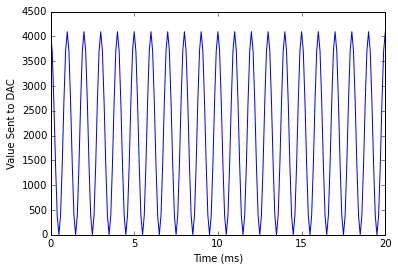

In [34]:
n_total_samples = 201
dac_output = np.zeros(n_total_samples)
time_dac_output = np.zeros(n_total_samples)
for i in range(n_total_samples):
    lut_index = np.mod(i,lut_length)
    dac_output[i] = lut[lut_index]
    time_dac_output[i] = i*t_interrupt * 1e-3  #convert to msec from usec

fig, ax = plt.subplots()
ax.plot(time_dac_output, dac_output)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Value Sent to DAC');

In [26]:
np.mod(10,10)

0

1000.0 0.5 -1.0


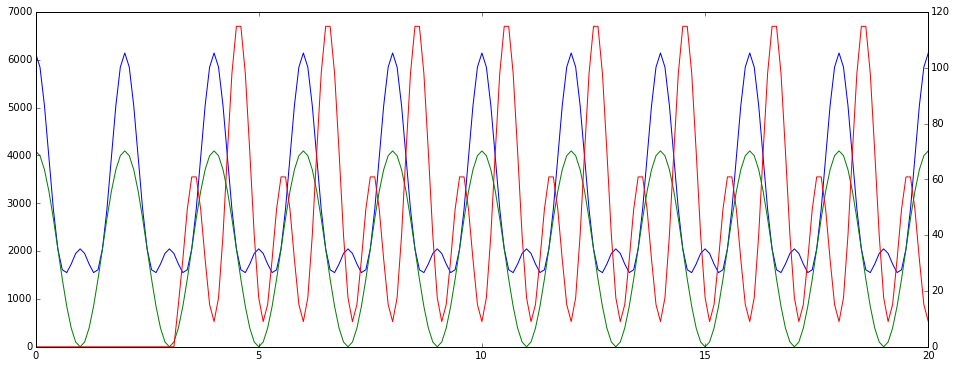

In [62]:
after_bp = np.zeros(n_total_samples)
second_freq = (4096/2)*(1.0 + np.cos(2.0*np.pi*(carrier_freq/2)*time_dac_output*1e-3))
adc_values = 0.5*dac_output + second_freq
print(carrier_freq, (carrier_freq)*time_dac_output[5]*1e-3, np.cos(2.0*np.pi*(carrier_freq)*time_dac_output[5]*1e-3))
for i in range(buf_length,n_total_samples):
    for j in range(buf_length):
        after_bp[i] += adc_values[i-(buf_length)+j+1] * bp_filter_coeff[j]
        #print(i, j, i-(buf_length)+j+1, after_bp[i], adc_values[i-(buf_length)+j+1], bp_filter_coeff[j])
        
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(time_dac_output, adc_values)
ax.plot(time_dac_output, second_freq)
ax2 = ax.twinx()
ax2.plot(time_dac_output, after_bp, 'r')